Let's try to determine the critical temperature of the 2D Ising ferromagnet by looking at the intersection point of the Binder cumulants for different system sizes. 

The simulation should take around several minutes on a single core if numba is properly installed. Sit back and relax.

In [3]:
import numpy as np
from spin_models import Ising  # First, we import the Ising class

lattice_shapes = [(10, 10), (20, 20), (40, 40)]  # specify the lattice shapes we need
temperatures = np.geomspace(1, 4, 30)  # specify the temperatures for simulation
isings = [Ising(shape, temperatures=temperatures) for shape in lattice_shapes]   # initialize the Ising instances

for ising in isings:
    ising.parallel_tempering(2**12, cluster_update=True)
    # ising.update_spins(n_sweeps=2**10, cluster_update=True)  # simulate them using single spin-flips with Wolff updates

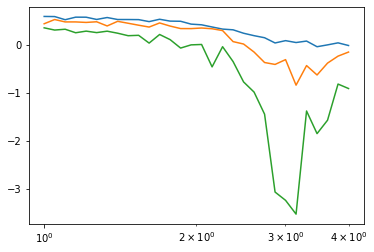

In [4]:
from matplotlib import pyplot as plt

binder_cumulants = np.vstack([ising.binder_cumulant for ising in isings]).T

plt.plot(temperatures, binder_cumulants)
plt.xscale('log')
plt.show()